
<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سری چهارم تمارین عملی درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر مریم امیر مزلقانی
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: محمد چوپان  
    </h5>
<p align=center style="font-size: 16;line-height:100%;font-family:vazir;color:#0099cc">
    <a href="mailto:Aut.DataMining.Fall@gmail.com">Aut.DataMining.Fall@gmail.com</a>
</p>


<div dir="rtl">
    
<p dir=rtl style="font-size: 16;line-height:100%;font-family:vazir;color:red;direction:rtl">
لطفا خواسته های تمرین را در بخش خودش انجام دهید.
</p>
</div>

# HW4

## Imports 

In [1]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

## Load Dataset

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    در این قسمت دیتاست کشور ها را با استفاده از کتابخانه pandas بخوانید. 
</font>
</p>
</div>

In [2]:
df = pd.read_csv('Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## Feature engineering

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت شما باید با استفاده از رسم نمودار های مختلف همانند نمودار جعبه ای و یا نقشه گرمایی داده ها را تحلیل کنید.
حداقل 5 نمودار مختلف را رسم کنید.
</font>
</p>
</div>

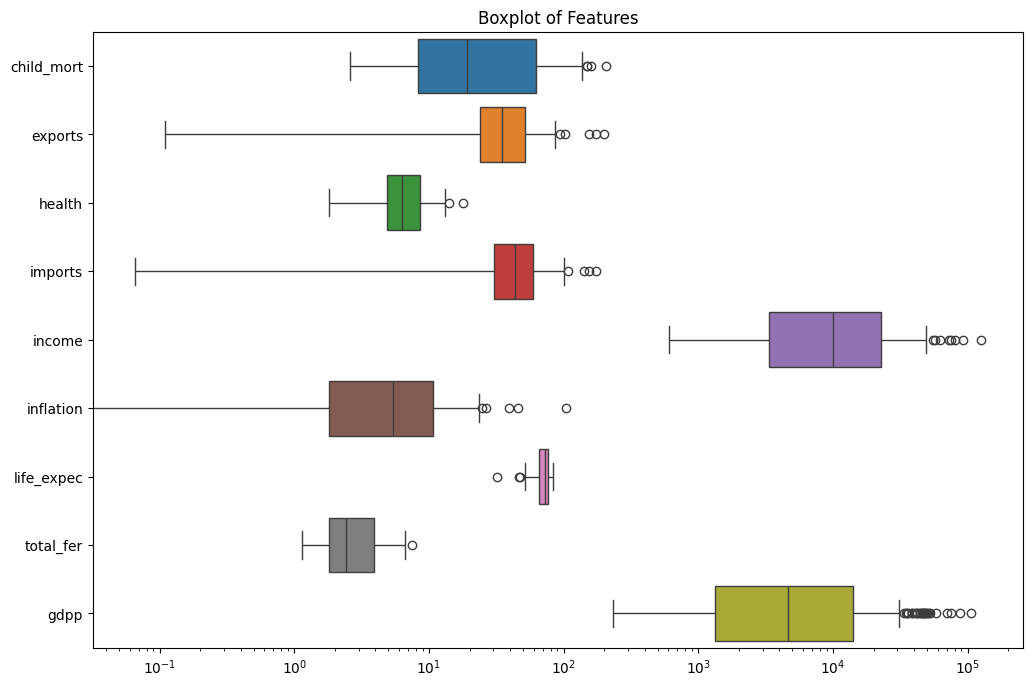

In [3]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h")
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title("Boxplot of Features")
plt.show()

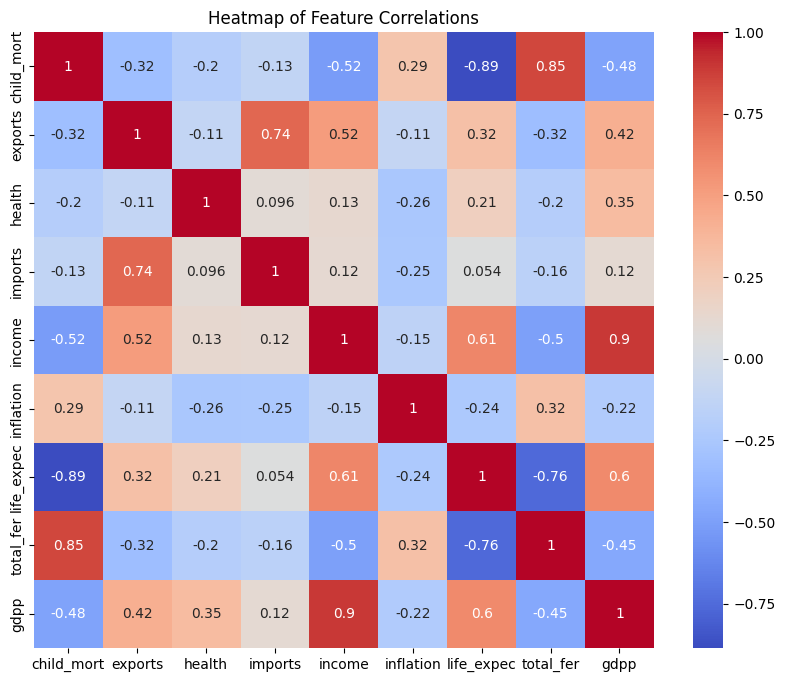

In [4]:
numeric_data = df.select_dtypes(include=[np.number])  # Select only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

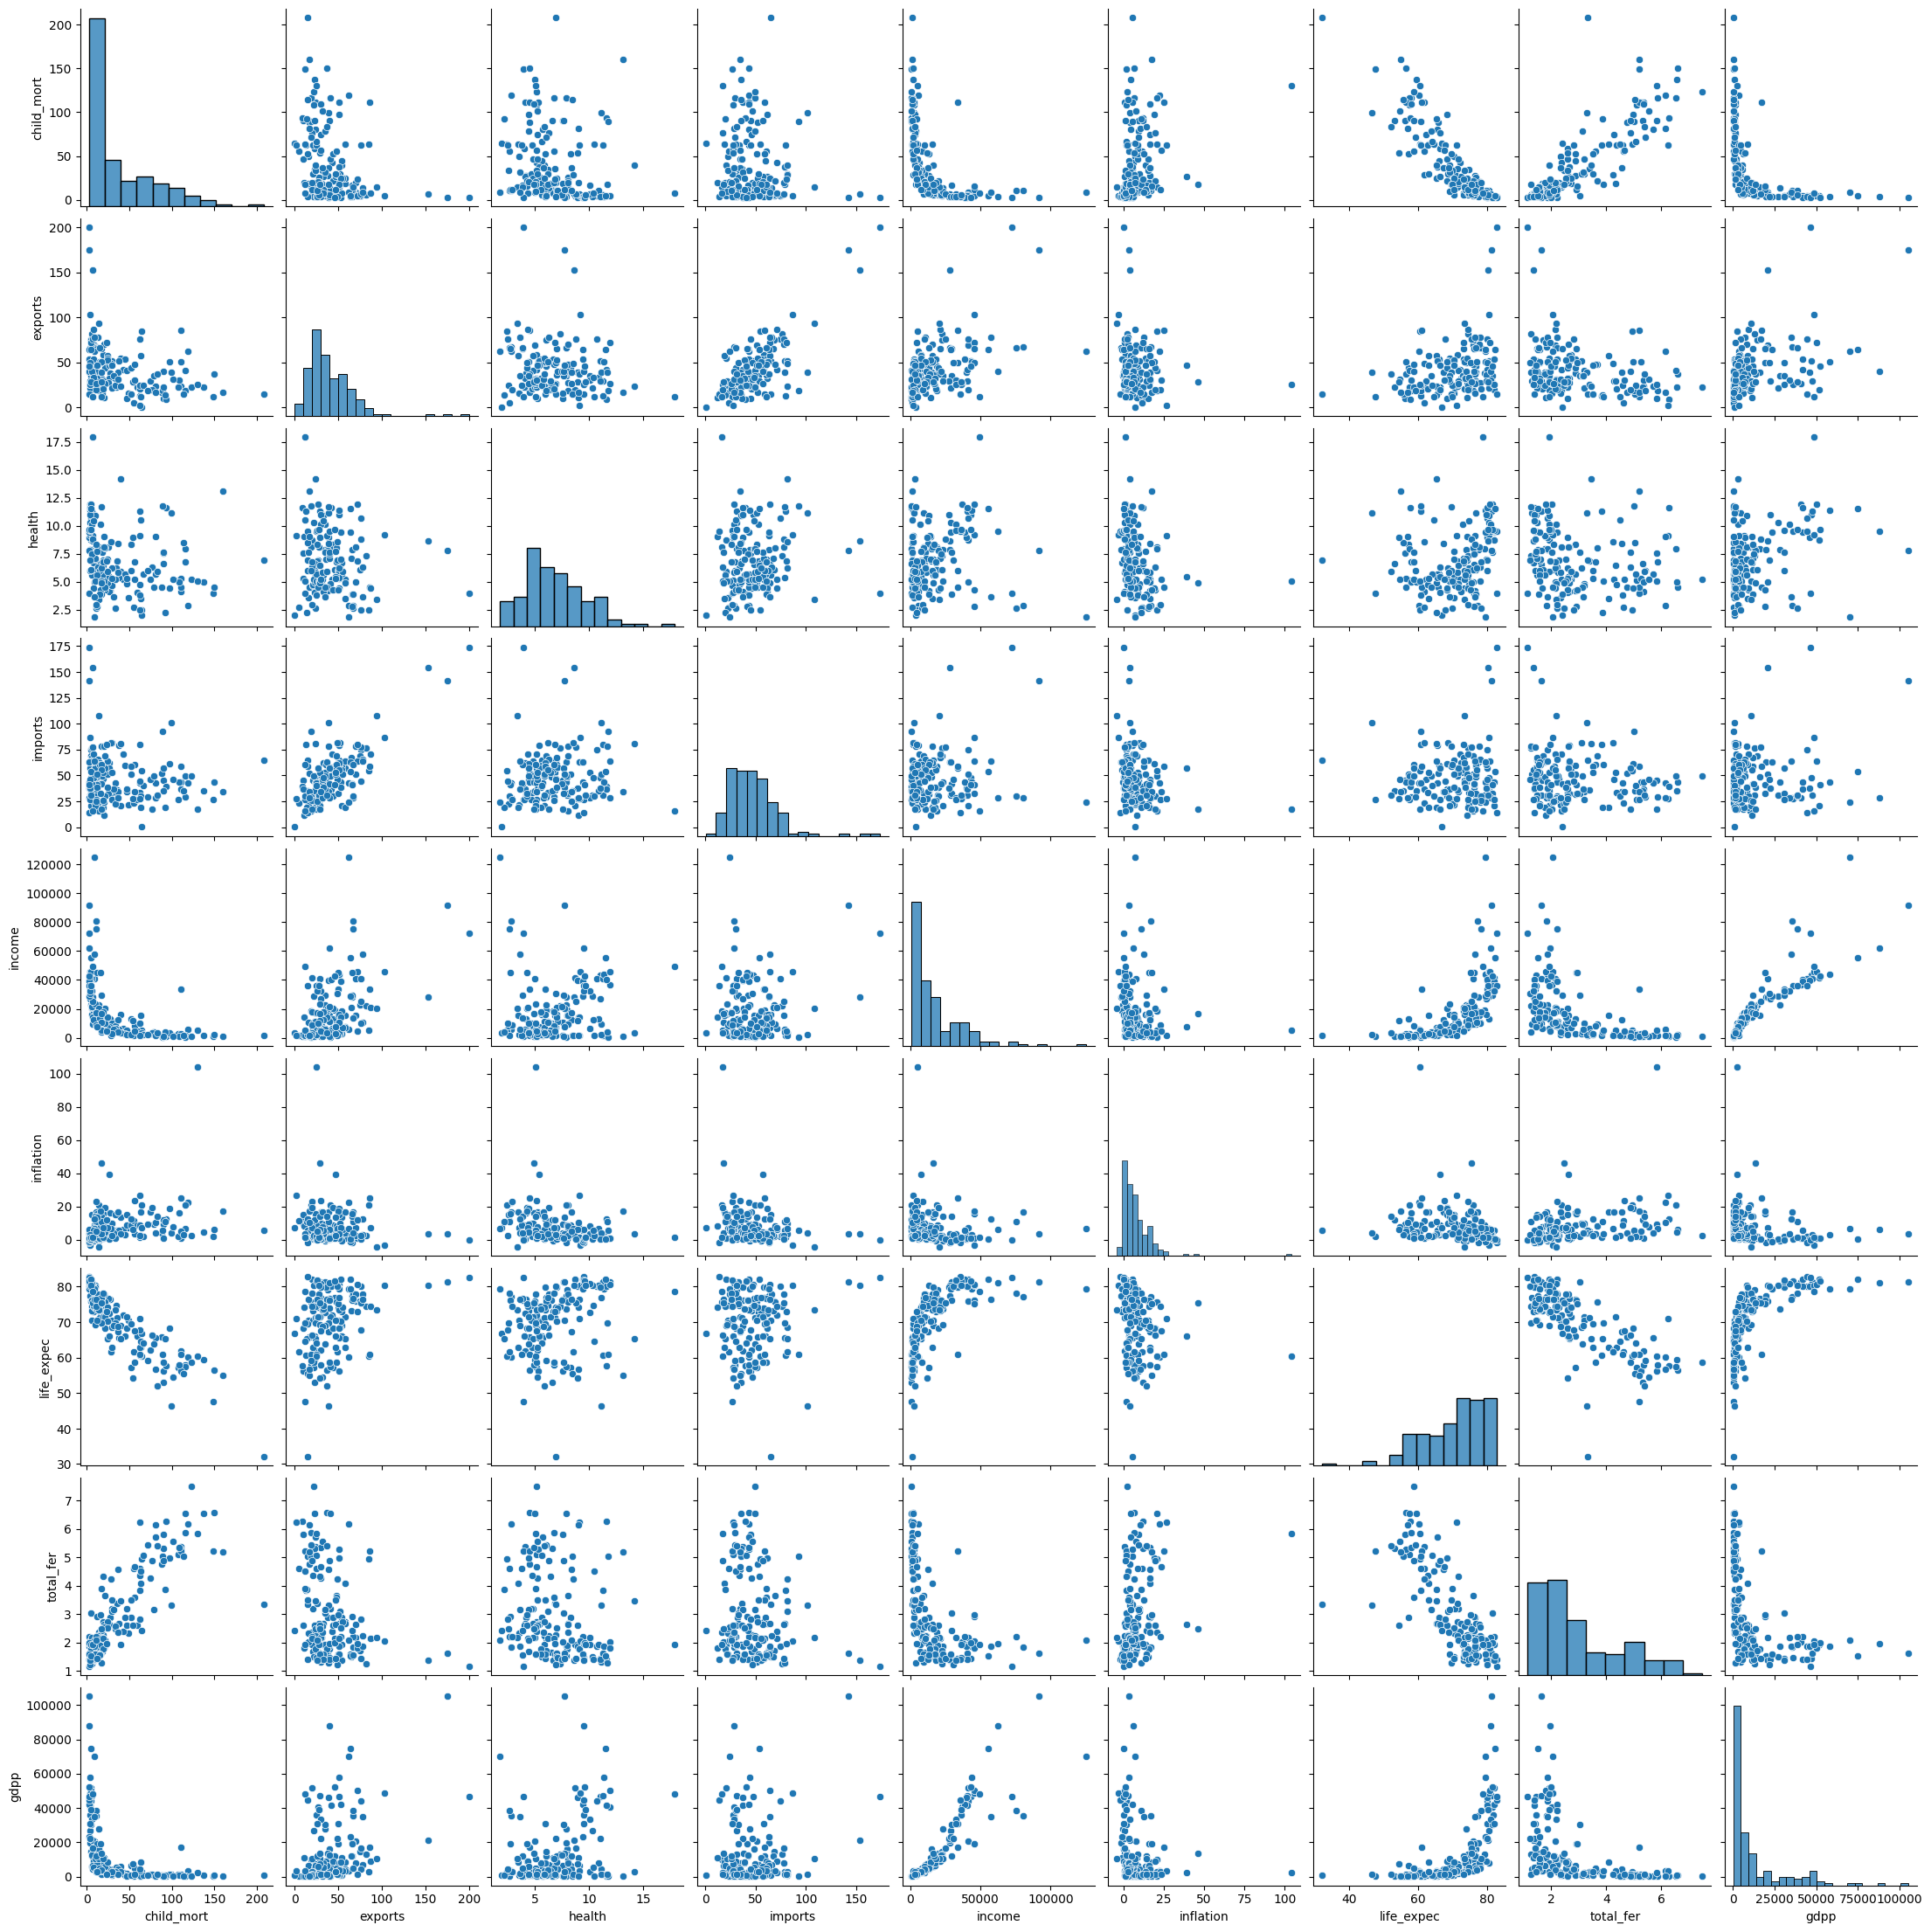

In [5]:
sns.pairplot(df)
plt.show()

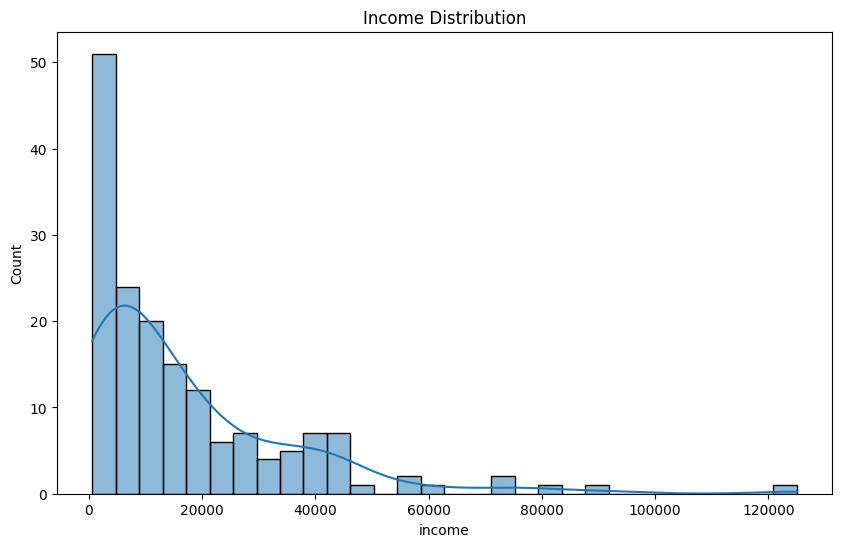

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.show()

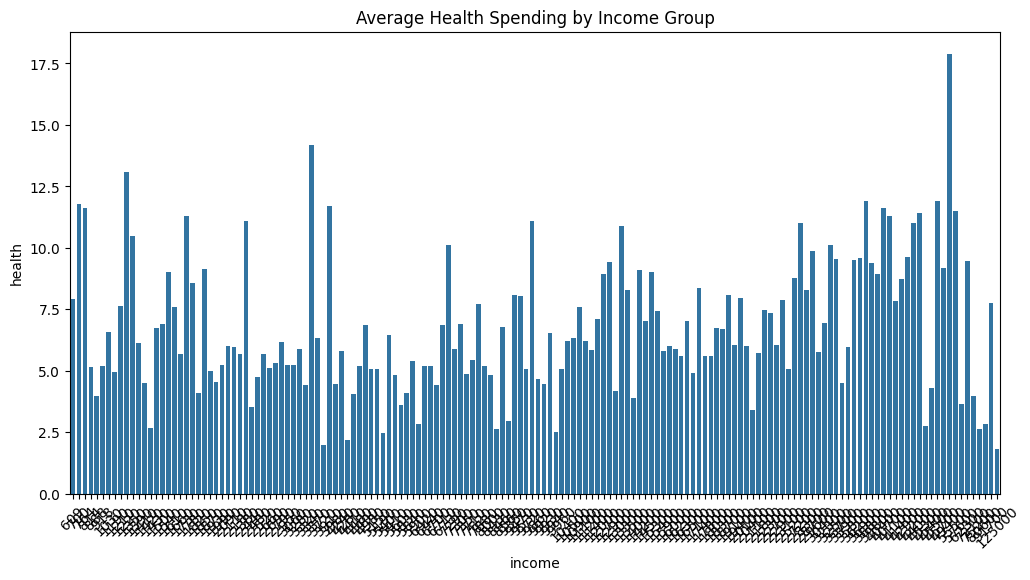

In [7]:
grouped_data = df.groupby('income')['health'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='income', y='health', data=grouped_data)
plt.title('Average Health Spending by Income Group')
plt.xticks(rotation=45)
plt.show()

### PCA

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
داده های خود را با استفاده از الگوریتم PCA به 2 بعد کاهش دهید.دقت کنید که به داده های اصلی نیاز داریم. پس حتما آن ها را ذخیره کنید.
</font>
</p>
</div>

In [8]:
original_data = df.copy()

numeric_data = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

original_data.reset_index(drop=True, inplace=True)
final_df = pd.concat([original_data, pca_df], axis=1)

final_df.to_csv('pca_transformed_data.csv', index=False)

final_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913025,0.095621
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429911,-0.588156
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285225,-0.455174
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932423,1.695555
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033576,0.136659
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,-0.820631,0.639570
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,-0.551036,-1.233886
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0.498524,1.390744
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,-1.887451,-0.109453


## Clustering

### Similarity

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> در این مرحله نیاز است که ماتریس شباهت دادگان را به دست آورید.برای هر یک از داده ها برداری از ویژگی هایش را در نظر گرفته  و ماتریس شباهت رابرای کل  دیتاست به دست آورید.برای معیار شباهت نیز یک بار از فاصله اقلیدسی و یک بار از شباهت کوسینوسی کمک بگیرید.
این کار را هم برای داده های کاهش داده شده و هم برای داده های اصلی انجام دهید.
</font>
</p>
</div> 

In [9]:
original_numeric_data = final_df.select_dtypes(include=[np.number])
pca_data = final_df[['PC1', 'PC2']]

def compute_similarity_matrices(data):
    euclidean_sim = euclidean_distances(data)
    cosine_sim = cosine_similarity(data)

    return euclidean_sim, cosine_sim

euclidean_sim_orig, cosine_sim_orig = compute_similarity_matrices(original_numeric_data)

euclidean_sim_pca, cosine_sim_pca = compute_similarity_matrices(pca_data)

In [10]:
print("Euclidean Distance Matrix for Original Data:", euclidean_sim_orig)

print("\nCosine Similarity Matrix for Original Data:", cosine_sim_orig)

print("\nEuclidean Distance Matrix for PCA-Reduced Data:", euclidean_sim_pca)

print("\nCosine Similarity Matrix for PCA-Reduced Data:", cosine_sim_pca)

Euclidean Distance Matrix for Original Data: [[    0.          9040.9613568  11947.14100056 ...  2979.48589963
   2968.49201312  1900.67515133]
 [ 9040.9613568      0.          2993.06883536 ...  6109.42318856
   6118.26290369  7151.56793803]
 [11947.14100056  2993.06883536     0.         ...  8980.76644804
   8989.99247414 10077.10957094]
 ...
 [ 2979.48589963  6109.42318856  8980.76644804 ...     0.
     72.33496714  1222.41780115]
 [ 2968.49201312  6118.26290369  8989.99247414 ...    72.33496714
      0.          1209.79925828]
 [ 1900.67515133  7151.56793803 10077.10957094 ...  1222.41780115
   1209.79925828     0.        ]]

Cosine Similarity Matrix for Original Data: [[1.         0.99629054 0.99801074 ... 0.99749944 0.99773327 0.99535871]
 [0.99629054 1.         0.99832396 ... 0.99409548 0.99425963 0.99929985]
 [0.99801074 0.99832396 1.         ... 0.99855506 0.99871227 0.99599669]
 ...
 [0.99749944 0.99409548 0.99855506 ... 1.         0.9998827  0.99070463]
 [0.99773327 0.994259

### Kmeans

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> بعد از پیاده سازی ماتریش شباهت باید در این مرحله الگوریتم Kmeans را پیاده سازی کنید.دقت کنید استفاده از 
    .
کتابخانه های  آماده مجاز نیست. همچنین مراکز اولیه باید به صورت تصادفی انتخاب شود و تعداد خوشه ها را نیز به صورت بهینه انتتخاب کنید
الگوریتم را تا  زمانی ادامه دهید که به دقت مناسبی برسد.
دقت کنید مجدد خوشه بندی را برای هر دو داده کاهش داده شده و اصلی باید انجام دهید.
</font>
</p>
</div> 

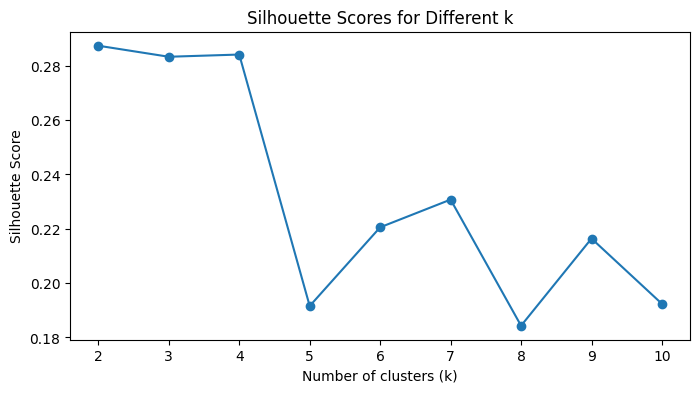

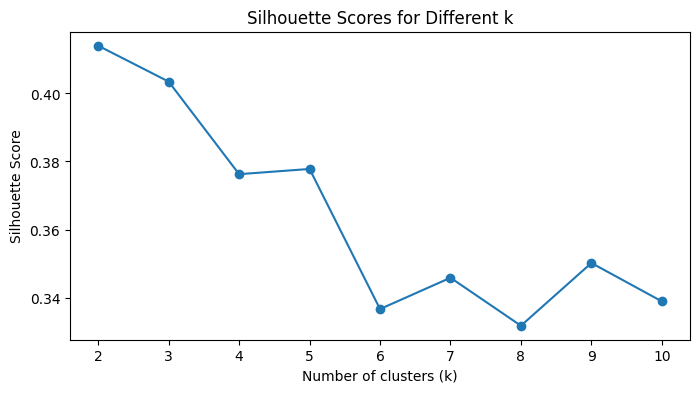

Optimal number of clusters for original data: 2
Optimal number of clusters for PCA-reduced data: 2


In [11]:
def initialize_centroids(data, k):
    indices = np.random.permutation(len(data))
    centroids = data[indices[:k]]
    return centroids

def determine_clusters(data, centroids):
    distances = np.linalg.norm(data[:, None] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans(data, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        labels = determine_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break
        centroids = new_centroids
    return labels, centroids

def find_optimal_k(data, max_k=10):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        labels, _ = kmeans(data, k)
        score = silhouette_score(data, labels) if len(set(labels)) > 1 else -1
        silhouette_scores.append(score)
    
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different k')
    plt.show()
    
    optimal_k = np.argmax(silhouette_scores) + 2  # +2 because we start with k=2
    return optimal_k

optimal_k_original = find_optimal_k(numeric_data_scaled, max_k=10)
optimal_k_pca = find_optimal_k(principal_components, max_k=10)

print(f"Optimal number of clusters for original data: {optimal_k_original}")
print(f"Optimal number of clusters for PCA-reduced data: {optimal_k_pca}")

labels_original, centroids_original = kmeans(numeric_data_scaled, optimal_k_original)
labels_pca, centroids_pca = kmeans(principal_components, optimal_k_pca)

### Results

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
در این مرحله نیاز است که نموداری بر اساس خوشه های خود همچنین دقت الگوریتم خود را به صورت نمودار و عددی نشان دهید.

</font>
</p>
</div> 

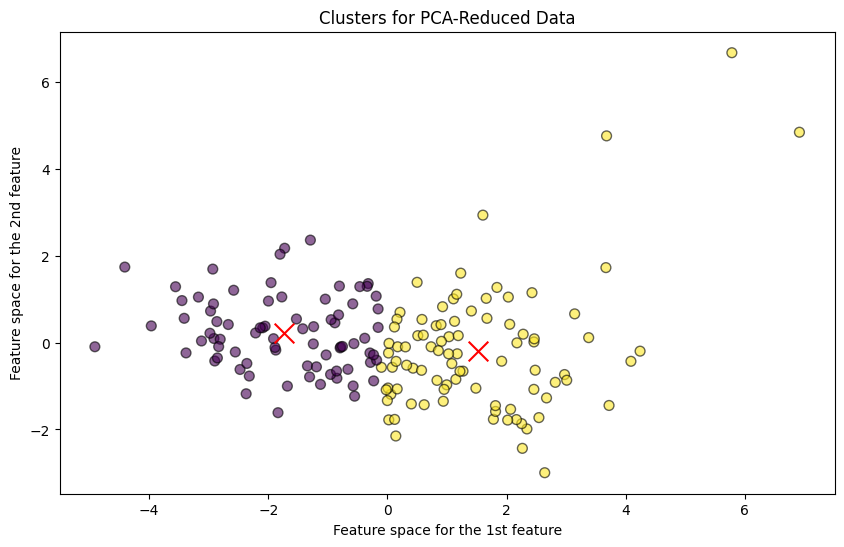

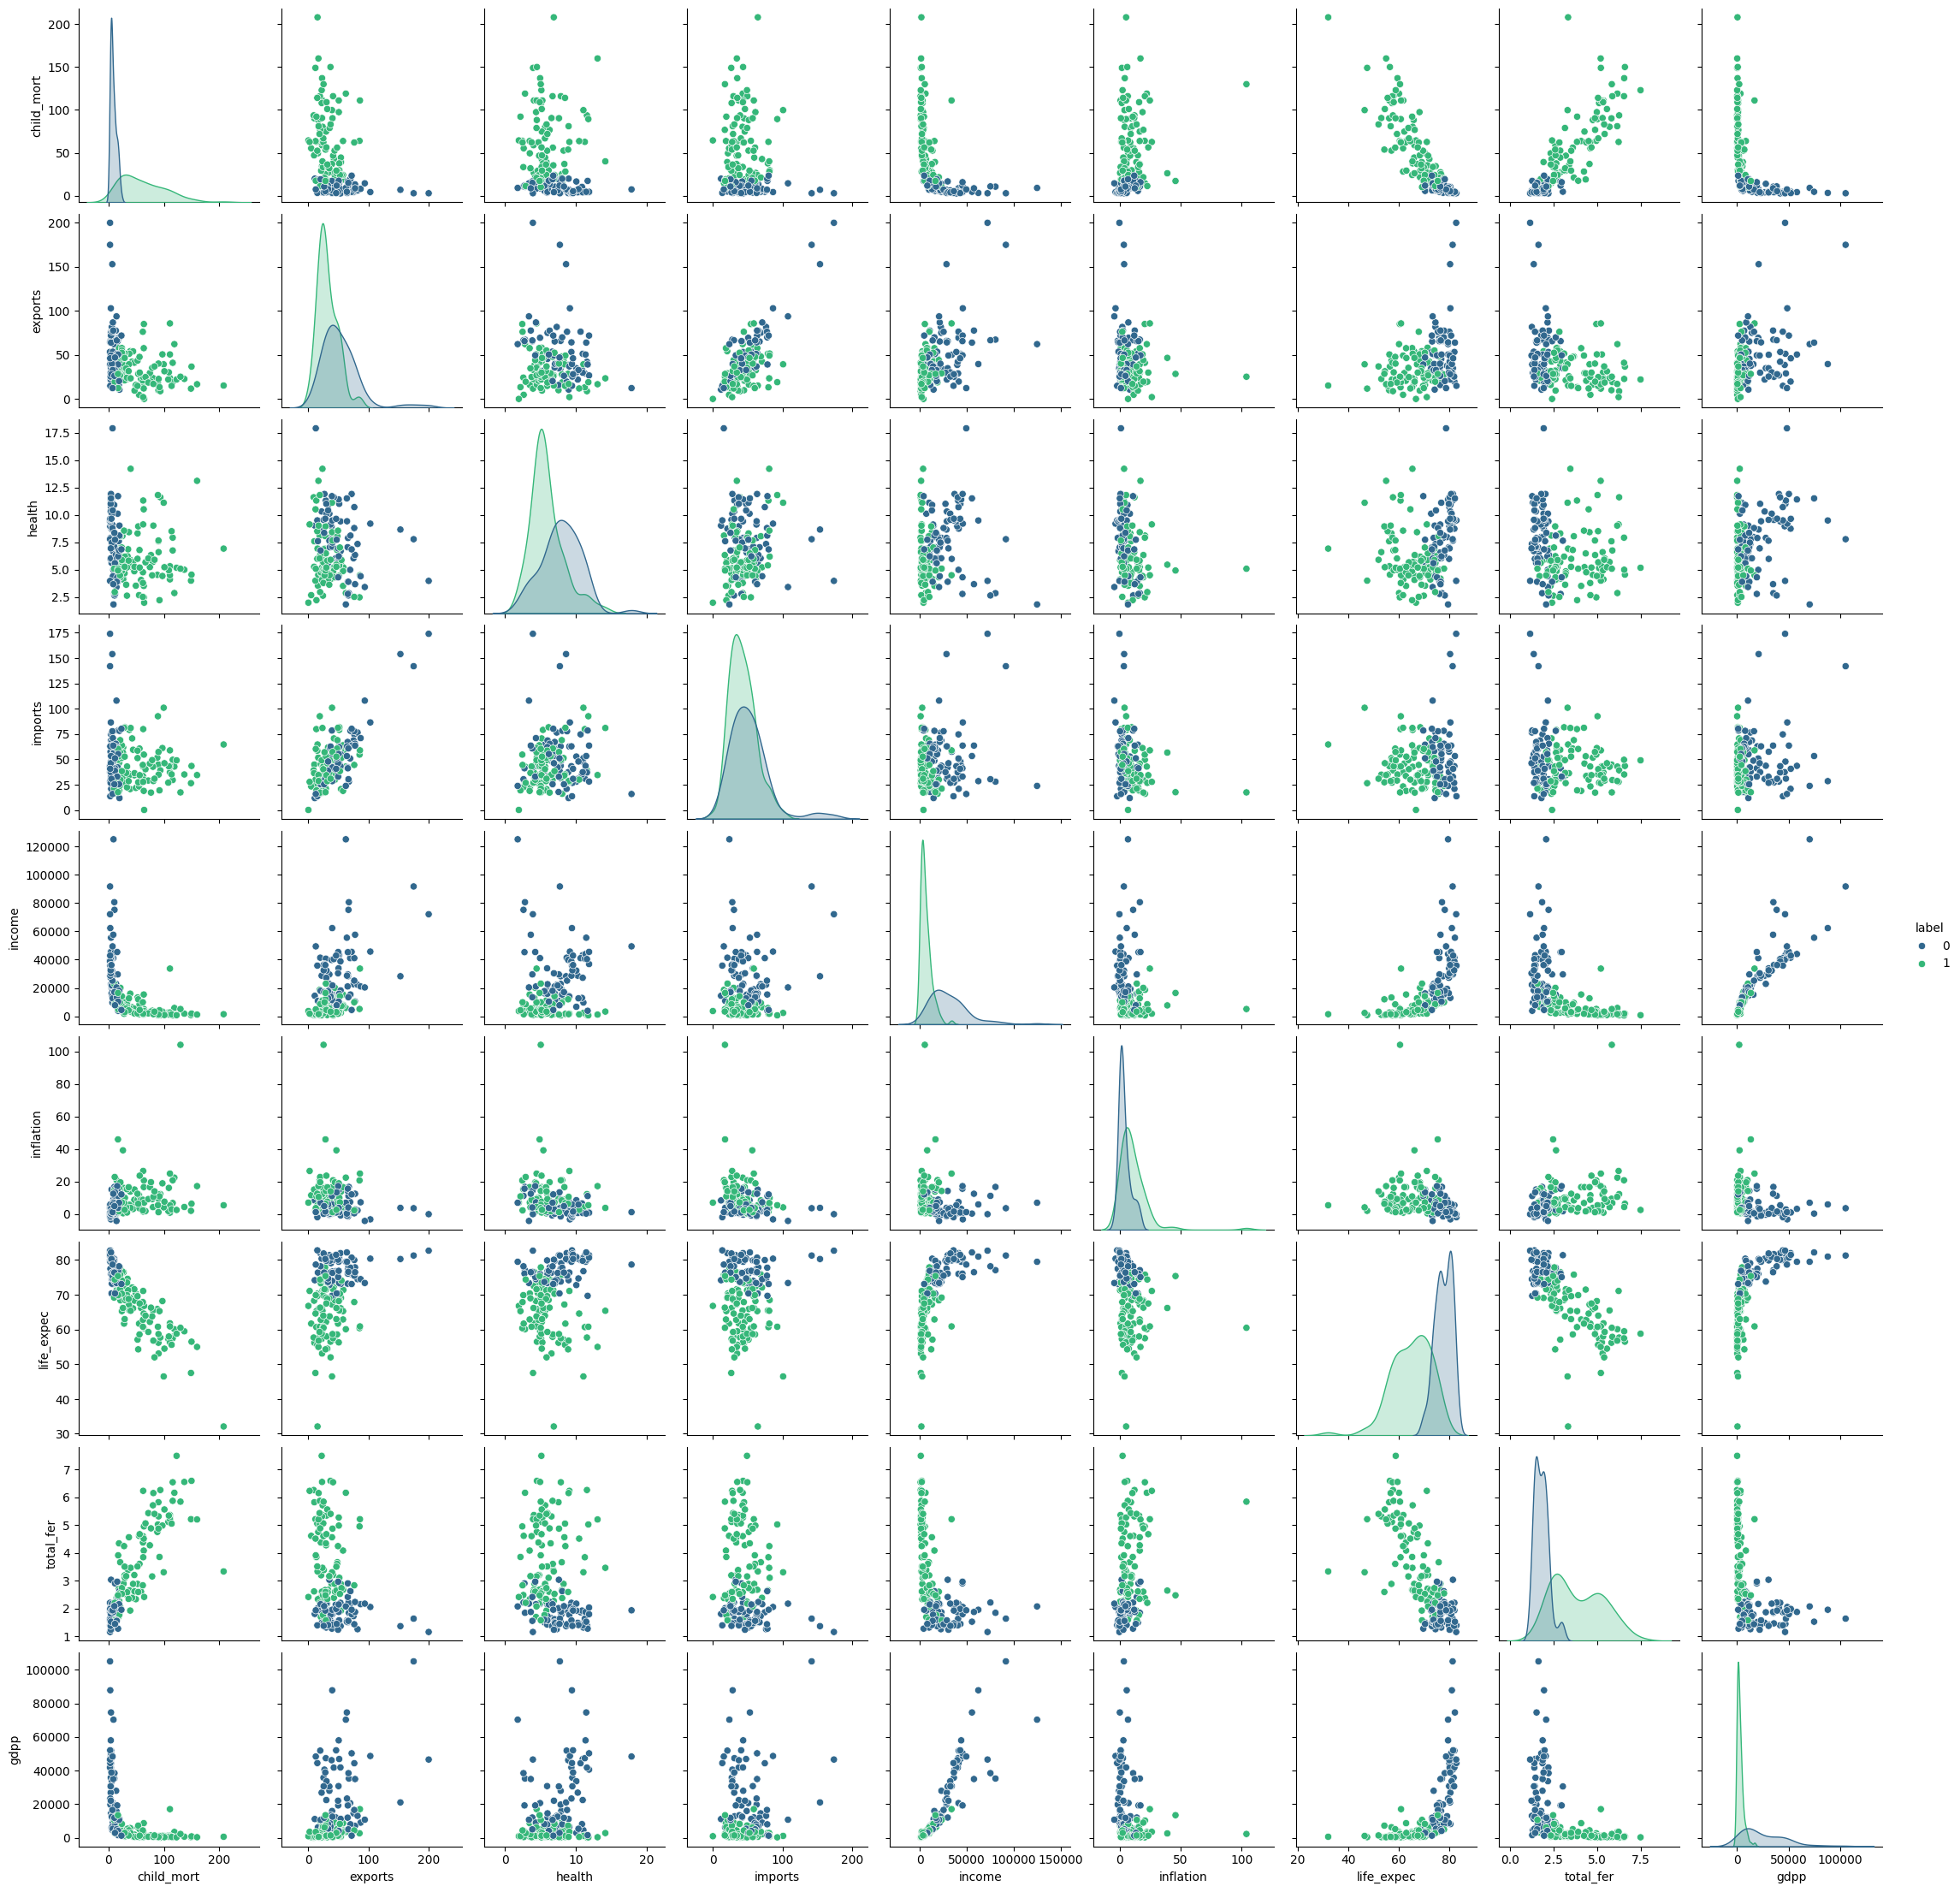

Silhouette Score (original):  0.2662961111870726
Silhouette Score (pca):  0.4140068220400773


In [12]:
def plot_clusters(data, labels, centroids, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='x')  # Mark centroids
    plt.title(title)
    plt.xlabel('Feature space for the 1st feature')
    plt.ylabel('Feature space for the 2nd feature')
    plt.show()

plot_clusters(principal_components, labels_pca, centroids_pca, "Clusters for PCA-Reduced Data")

df['label'] = labels_original
sns.pairplot(df, hue='label', palette='viridis')
plt.show()

print('Silhouette Score (original): ' ,silhouette_score(numeric_data_scaled, labels_original))
print('Silhouette Score (pca): ' ,silhouette_score(principal_components, labels_pca))

def plot_silhouette_scores(silhouette_scores, max_k):
    plt.figure(figsize=(8, 4))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Different k')
    plt.show()

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> نتایج به دست آمده بالا را با یکدیگر مقایسه کرده و نتیجه را توجیه کنید.
</font>
</p>
</div> 

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium;color:blue">
<font face="vazir" size=3>با توجه به بالاتر بودن امتیاز تکنیک PCA
    تکنیک PCA بهبود معناداری در عملکرد خوشه‌بندی داده‌ها را نشان می‌دهد، زیرا با کاهش ابعاد، ویژگی‌های مجزا و مشخص‌تری برای داده‌ها بدست می‌آید. کاهش ابعاد یک فرآیند پراهمیت در پیش‌پردازش داده‌ها است که می‌تواند بهبود قابل توجهی در توانایی خوشه‌بندی داده‌ها ایجاد کند. این عمل با حذف ویژگی‌های غیرضروری و تکراری انجام می‌شود و به تمرکز بر روی اطلاعات مهم و تمایزدهنده داده‌ها کمک می‌کند. علاوه بر این، با کاهش تعداد ابعاد، مصرف محاسباتی الگوریتم‌های خوشه‌بندی کاهش می‌یابد که منجر به افزایش کارایی و سرعت اجرای آنها می‌شود.
</font>
</p>
</div> 

### DBSCAN

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
الگوریتم DBSCAN را بر هر دو داده کاهش داده شده و اصلی پساده سازی کنید.
    مجددا نمی توانید در اینجا از کتابخانه های آماده استفاده کنید.
</font>
</p>
</div>

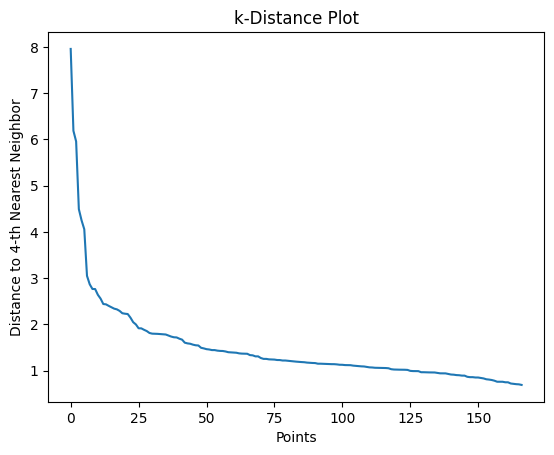

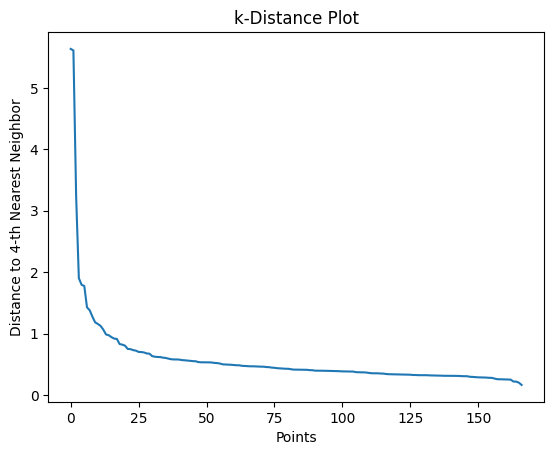

In [13]:
class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, data):
        labels = np.full(len(data), -1)
        cluster_id = 0

        for i in range(len(data)):
            if labels[i] != -1:
                continue

            neighbors = self._region_query(data, i)
            if len(neighbors) < self.min_samples:
                labels[i] = -2  # Mark as noise
            else:
                self._expand_cluster(data, labels, i, neighbors, cluster_id)
                cluster_id += 1

        self.labels_ = labels

    def _region_query(self, data, point_idx):
        neighbors = []
        for i in range(len(data)):
            if np.linalg.norm(data[point_idx] - data[i]) <= self.eps:
                neighbors.append(i)
        return neighbors

    def _expand_cluster(self, data, labels, point_idx, neighbors, cluster_id):
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            next_point_idx = neighbors[i]
            if labels[next_point_idx] == -2:
                labels[next_point_idx] = cluster_id
            elif labels[next_point_idx] == -1:
                labels[next_point_idx] = cluster_id
                next_neighbors = self._region_query(data, next_point_idx)
                if len(next_neighbors) >= self.min_samples:
                    neighbors += next_neighbors
            i += 1

def k_distance(data, k):
    distances = []
    for point in data:
        sorted_dists = np.sort(np.linalg.norm(data - point, axis=1))
        distances.append(sorted_dists[k])
    return sorted(distances, reverse=True)

def optimal_eps(data, k=4):
    distances = k_distance(data, k)
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'Distance to {k}-th Nearest Neighbor')
    plt.title('k-Distance Plot')
    plt.show()
    return np.percentile(distances, 90)

def optimal_min_samples(data):
    return data.shape[1] * 2

eps_original = optimal_eps(numeric_data_scaled)
min_samples_original = optimal_min_samples(numeric_data_scaled)
dbscan_original = DBSCAN(eps=eps_original, min_samples=min_samples_original)
dbscan_original.fit(numeric_data_scaled)

eps_pca = optimal_eps(principal_components)
min_samples_pca = optimal_min_samples(principal_components)
dbscan_pca = DBSCAN(eps=eps_pca, min_samples=min_samples_pca)
dbscan_pca.fit(principal_components)

labels_original = dbscan_original.labels_
labels_pca = dbscan_pca.labels_

### Results

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
در این مرحله نیاز است که نموداری بر اساس خوشه های خود همچنین دقت الگوریتم خود را به صورت نمودار و عددی نشان دهید.
همچنین مقادری بهینه minpts و eps را گزارش کنید.
</font>
</p>
</div> 

In [14]:
print("Optimal parameters for original data:")
print("Eps (original data):", eps_original)
print("Min Samples (original data):", min_samples_original)

print("Optimal parameters for PCA-reduced data:")
print("Eps (PCA-reduced data):", eps_pca)
print("Min Samples (PCA-reduced data):", min_samples_pca)

Optimal parameters for original data:
Eps (original data): 2.3335465812906384
Min Samples (original data): 18
Optimal parameters for PCA-reduced data:
Eps (PCA-reduced data): 0.9141426544960731
Min Samples (PCA-reduced data): 4


## Selection of `minPts` and `eps` in DBSCAN

### Determining `eps`:

- **K-Distance Plot**: The `eps` value is determined using a k-distance plot. This plot visualizes the distance to the k-th nearest neighbor for each point in the dataset, sorted in descending order.
  
- **Percentile Approach**: After plotting the k-distance graph, the `eps` value is chosen as the 90th percentile of these distances. This approach aims to capture a distance where a significant change (elbow point) in neighbor distances is observed, indicating a suitable `eps` value for capturing the density threshold.

### Determining `minPts`:

- **Heuristic Based on Data Dimensionality**: The `minPts` value is set based on a heuristic related to the dimensionality of the dataset. Specifically, `minPts` is chosen as twice the number of features (dimensions) in the dataset. This heuristic assumes that a higher number of dimensions requires more points to form a dense region.

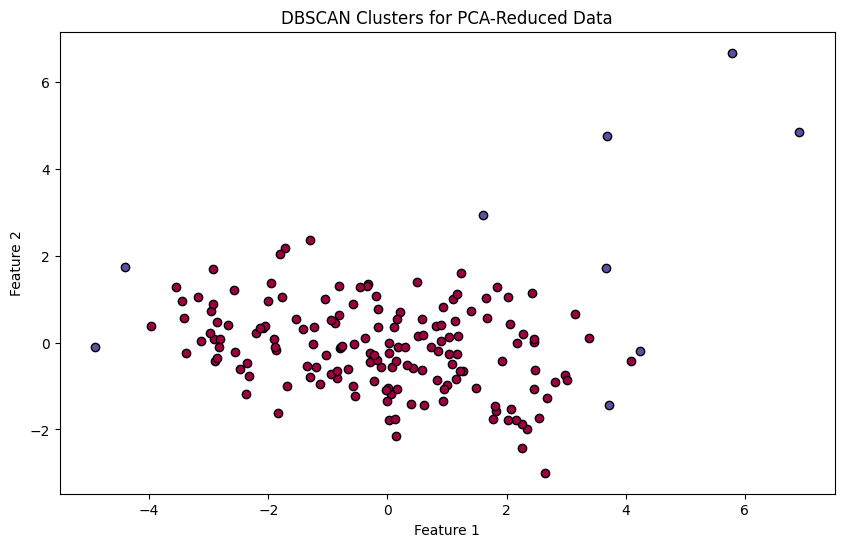

Silhouette Score (original): 0.40210298952159035
Silhouette Score (pca): 0.5175932050872856


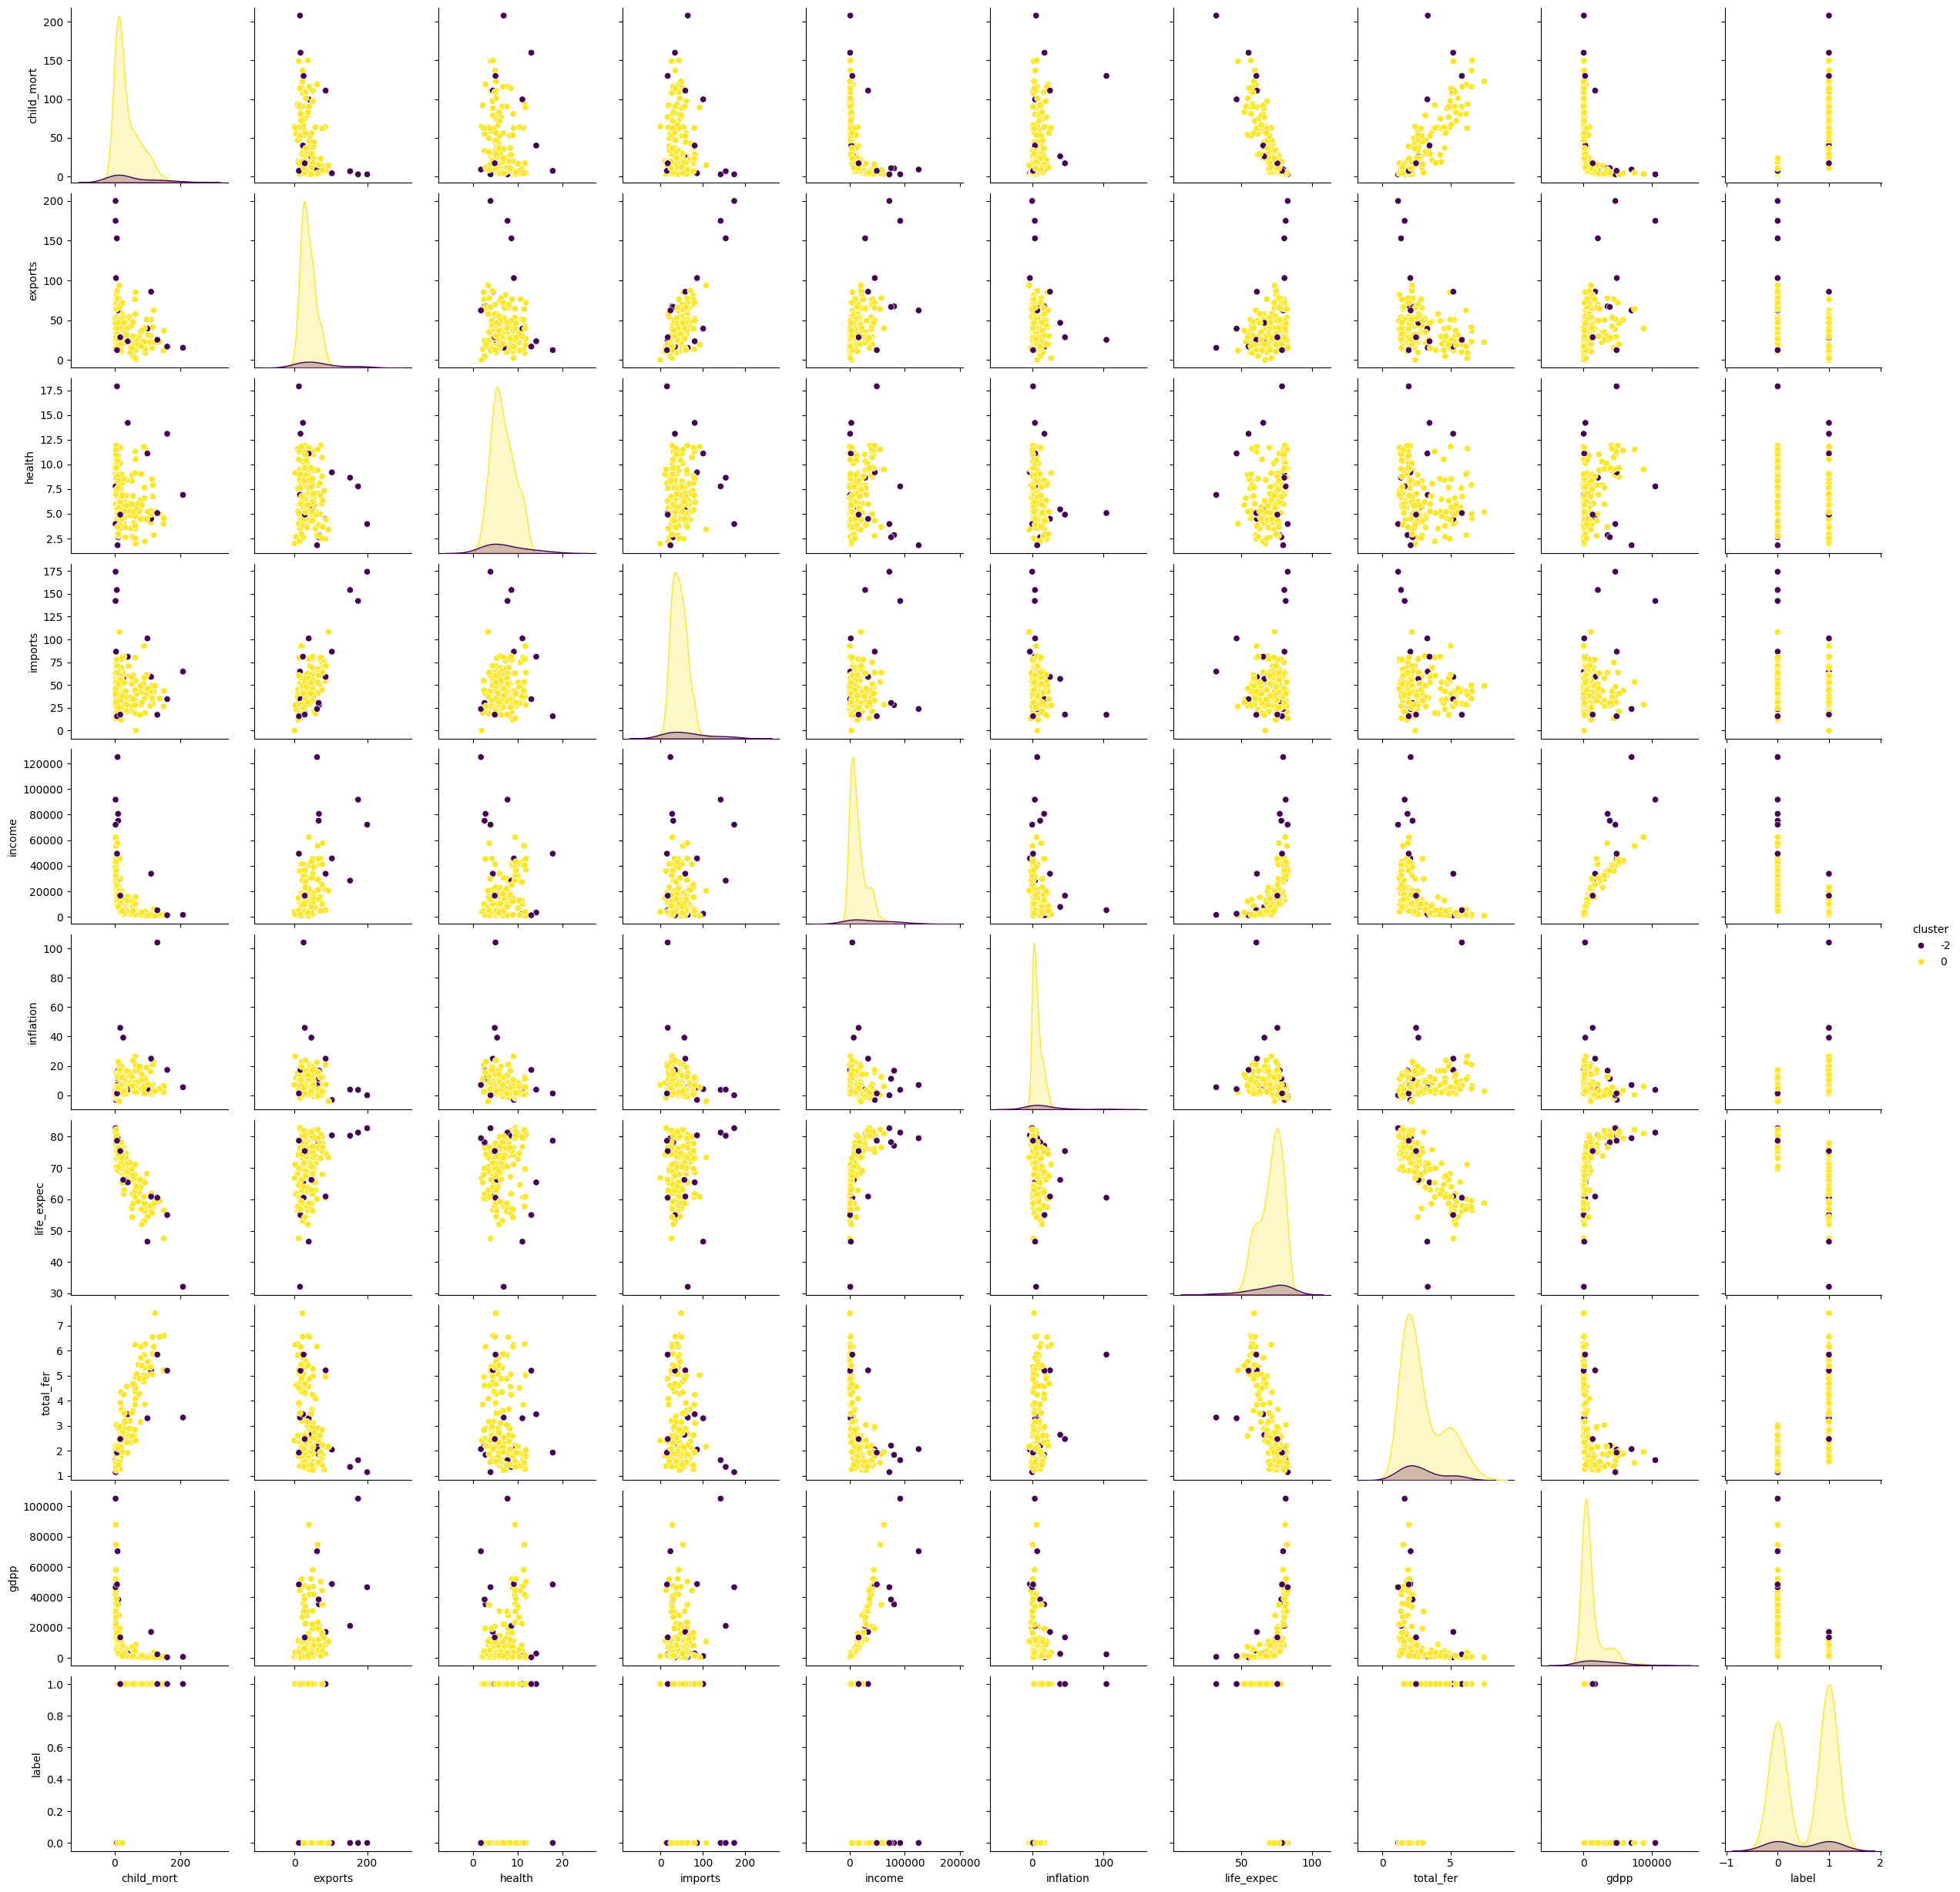

In [15]:
def plot_dbscan_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)
        xy = data[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_dbscan_clusters(principal_components, labels_pca, "DBSCAN Clusters for PCA-Reduced Data")

def safe_silhouette_score(data, labels):
    if len(set(labels)) in [0, -1]:
        return -1  # Silhouette score not defined for 0 cluster
    return silhouette_score(data, labels)

print('Silhouette Score (original):', safe_silhouette_score(numeric_data_scaled, labels_original))
print('Silhouette Score (pca):', safe_silhouette_score(principal_components, labels_pca))


df['cluster'] = labels_original

sns.pairplot(df, hue='cluster', palette='viridis', diag_kind='kde')
plt.show()

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
نتایج به دست آمده از مرحله قبل را با این مرحله مقایسه کرده و علت بهتر بودن الگوریتم بهینه را توجیه کنید
</font>
</p>
</div> 

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium;color:blue";>
<font face="vazir" size=3> 
استفاده از تکنیک PCA برای کاهش ابعاد و بهبود امتیازات خوشه‌بندی حاکی از تأثیرگذاری مؤثر آن است.
 این رویکرد، که یکی از روش‌های کلیدی در پیش‌پردازش داده‌ها محسوب می‌شود، منجر به ایجاد خوشه‌هایی با ویژگی‌های دقیق‌تر و تمایز بیشتر می‌گردد.
در مقایسه با الگوریتم K-means، مشاهده می‌شود که DBSCAN امتیازات برتری به دست آورده است. در DBSCAN، خوشه‌ها چگالی بیشتری دارند و به دلیل حذف نویزها، کیفیت خوشه‌بندی افزایش می‌یابد. همانطور که در نمونه‌ها قابل مشاهده است، داده‌های درون خوشه‌های ایجاد شده توسط DBSCAN همگن‌تر و متراکم‌تر هستند. در مقابل، در K-means نویزها نیز در شکل‌گیری خوشه‌ها دخیل بوده‌اند، که این موضوع بیانگر عدم دقت و کمتر بودن قابلیت انطباق الگوریتم با نویزها یا داده‌های پرت است.

</font>
</p>
</div> 

## Association rules

<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3> 
در این مرحله باید هر دو دیتا ست داده شده به شما را خوانده و سپس برای محموعه داده کوچکتر آستانه پشتیبانی و آستانه اطمینان را به صورت ورودی از کاربر گرفته و سپس تمام قوانین انجمنی معتبر را برای آن ها به دست آورید.
    برای مجموعه داده های بزرگتر نیز مجدد آستانه پشتنیبانی و اطمینان را دریافت کرده و 3 کالایی که بیشترین خرید را با هم داشته اند به دست آورید.
</font>
</p>
</div> 

In [16]:
df = pd.read_csv('GroceryStoreDataSet.csv', names=['items'])

df['items'] = df['items'].apply(lambda x: x.split(','))

support_threshold = float(input("Enter support_threshold: "))
confidence_threshold = float(input("Enter confidence_threshold: "))
print('support_threshold:', support_threshold, '\nconfidence_threshold:', confidence_threshold)

te = TransactionEncoder()
te_ary = te.fit(df['items']).transform(df['items'])
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=support_threshold, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_threshold)

for idx, rule in rules.iterrows():
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))
    print(f'confidence = {rule["confidence"]:.3f}     {antecedents} -> {consequents}')

Enter support_threshold:  0.2
Enter confidence_threshold:  0.2


support_threshold: 0.2 
confidence_threshold: 0.2
confidence = 0.571     BISCUIT -> BREAD
confidence = 0.308     BREAD -> BISCUIT
confidence = 0.308     BREAD -> MILK
confidence = 0.800     MILK -> BREAD
confidence = 0.308     BREAD -> SUGER
confidence = 0.667     SUGER -> BREAD
confidence = 0.571     TEA -> BREAD
confidence = 0.308     BREAD -> TEA
confidence = 0.667     CORNFLAKES -> COFFEE
confidence = 0.500     COFFEE -> CORNFLAKES
confidence = 0.500     COFFEE -> SUGER
confidence = 0.667     SUGER -> COFFEE
confidence = 0.800     MAGGI -> TEA
confidence = 0.571     TEA -> MAGGI


In [17]:
def prepare_dataset(file_name):
    data = pd.read_csv(file_name)
    return data.apply(lambda row: row.dropna().tolist(), axis=1)

def encode_transactions(transaction_data):
    encoder = TransactionEncoder()
    encoded_array = encoder.fit_transform(transaction_data)
    return pd.DataFrame(encoded_array, columns=encoder.columns_)

def find_frequent_itemsets(encoded_df, support_threshold, num_items):
    itemsets = apriori(encoded_df, min_support=support_threshold, use_colnames=True)
    return itemsets[itemsets['itemsets'].apply(lambda x: len(x) == num_items)]

transaction_list = prepare_dataset('Grocery Products Purchase.csv')

encoded_data = encode_transactions(transaction_list)

min_support_threshold = float(input("Enter the minimum support threshold (e.g., 0.01 for 1%): "))

frequent_3_itemsets = find_frequent_itemsets(encoded_data, min_support_threshold, 3)

top_frequent_3_itemset = frequent_3_itemsets.sort_values(by='support', ascending=False).head(1)

print("Top frequent 3-itemset based on support:")
print(top_frequent_3_itemset)

Enter the minimum support threshold (e.g., 0.01 for 1%):  0.01


Top frequent 3-itemset based on support:
      support                                         itemsets
316  0.023183  (whole milk, other vegetables, root vegetables)
